## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading the data from CSV file

In [ ]:
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Get the shape of the data

In [ ]:
df.shape
## Output shows 145460 rows of 23 columns

(145460, 23)

## Get information of data

In [ ]:
df.info()
#The output results show column name, non-null count and data type of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Check for Null values in the dataset

In [ ]:
df.isna().sum()
#The output result shows many columns have large amount of null values.

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
## Display count of missing values
print('Column "Evaporation" has' , df.Evaporation.isna().sum(), 'missing values')
print('Column "Sunshine" has' , df.Sunshine.isna().sum(), 'missing values')
print('Column "Cloud9am" has' , df.Cloud9am.isna().sum(), 'missing values')
print('Column "Cloud3pm" has' , df.Cloud3pm.isna().sum(), 'missing values')

Column "Evaporation" has 62790 missing values
Column "Sunshine" has 69835 missing values
Column "Cloud9am" has 55888 missing values
Column "Cloud3pm" has 59358 missing values


## Drop columns with the most missing values

In [ ]:
## Dropping columns that have more than 30% missing values.
df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Temp9am        143693 non-null  float64
 16  Temp3pm        141851 non-null  float64
 17  RainToday      142199 non-nul

## Drop rows where RainTomorrow values are null

In [ ]:
df = df.dropna(subset = ['RainTomorrow'])
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   WindGustDir    132863 non-null  object 
 6   WindGustSpeed  132923 non-null  float64
 7   WindDir9am     132180 non-null  object 
 8   WindDir3pm     138415 non-null  object 
 9   WindSpeed9am   140845 non-null  float64
 10  WindSpeed3pm   139563 non-null  float64
 11  Humidity9am    140419 non-null  float64
 12  Humidity3pm    138583 non-null  float64
 13  Pressure9am    128179 non-null  float64
 14  Pressure3pm    128212 non-null  float64
 15  Temp9am        141289 non-null  float64
 16  Temp3pm        139467 non-null  float64
 17  RainToday      140787 non-nul

(142193, 19)

## Check correlation between attributes

Text(0.5, 1.0, 'Correlation between attributes')

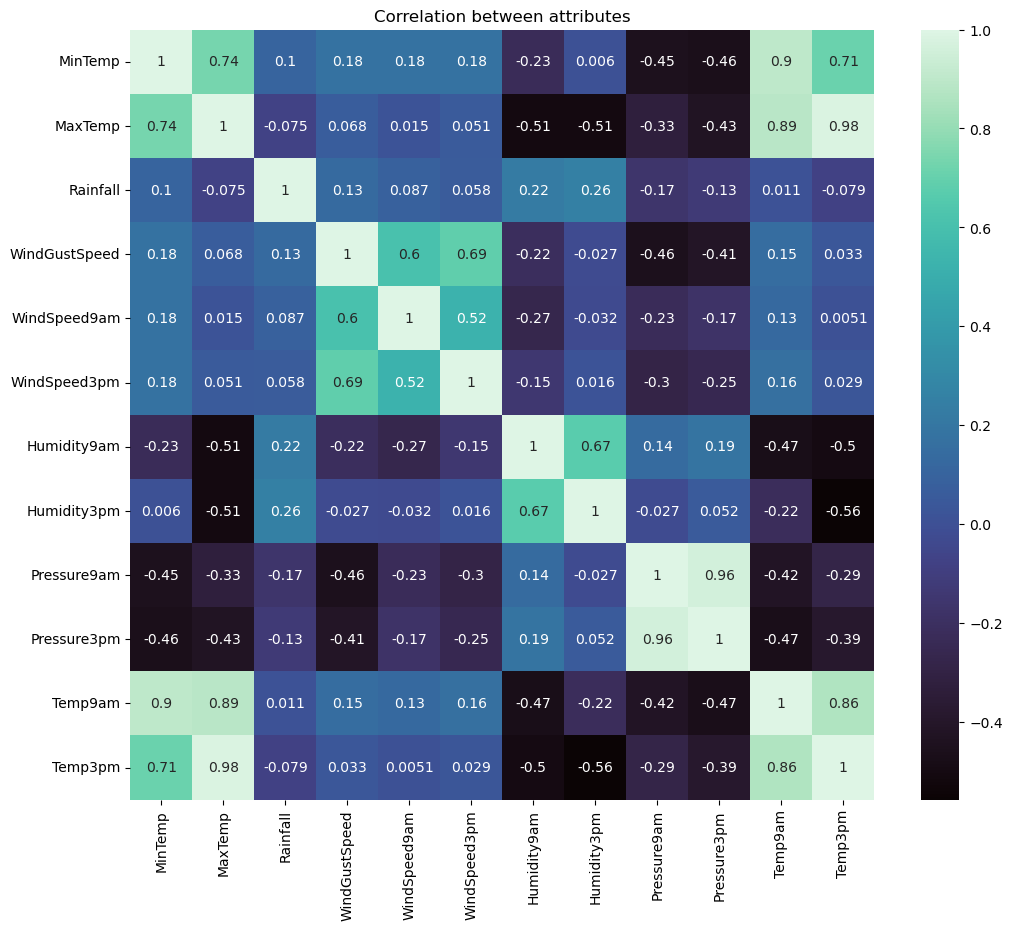

In [ ]:
import seaborn as sns

cor = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(data = cor, annot = True , cmap = 'mako')
plt.title('Correlation between attributes')
## MaxTemp & Temp3pm : 0.98
## Pressure9am & Pressure3pm : 0.96
## MinTemp & Temp9am : 0.9
## MaxTemp & Temp9am : 0.89
## Temp9am & Temp3pm : 0.86

## Dropping columns in each pair which have strong correlelation

In [ ]:
## https://quantifyinghealth.com/correlation-collinearity-multicollinearity/
## Preventing Collinearity Problems where 2 independant variables have a strong relationship
df.drop(['Temp9am','Temp3pm','Pressure3pm'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   WindGustDir    132863 non-null  object 
 6   WindGustSpeed  132923 non-null  float64
 7   WindDir9am     132180 non-null  object 
 8   WindDir3pm     138415 non-null  object 
 9   WindSpeed9am   140845 non-null  float64
 10  WindSpeed3pm   139563 non-null  float64
 11  Humidity9am    140419 non-null  float64
 12  Humidity3pm    138583 non-null  float64
 13  Pressure9am    128179 non-null  float64
 14  RainToday      140787 non-null  object 
 15  RainTomorrow   142193 non-null  object 
dtypes: float64(9), object(7)
memory usage: 18.4+ MB


\## Filling null "float" data type columns with mean & null "object" data type columns with mode

In [ ]:
df.isna().sum()
#The output result shows many columns have large amount of null values.

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
RainToday         1406
RainTomorrow         0
dtype: int64

In [ ]:
for column in df:
    if(df[column].isnull().sum()!=0):
            if(df[column].dtype !='object'):
                df[column].fillna(df[column].mean(),inplace=True)
            else:
                df[column].fillna(df[column].mode()[0],inplace=True)

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,No,No


In [ ]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
RainToday        0
RainTomorrow     0
dtype: int64

## Convert "object" data type columns to numerical using LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in df:
    if(df[column].dtype == 'object'):
               df[column] = le.fit_transform(df[column])

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,0,0
1,397,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,0,0
2,398,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,0,0
3,399,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,0,0
4,400,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  int32  
 1   Location       142193 non-null  int32  
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       142193 non-null  float64
 5   WindGustDir    142193 non-null  int32  
 6   WindGustSpeed  142193 non-null  float64
 7   WindDir9am     142193 non-null  int32  
 8   WindDir3pm     142193 non-null  int32  
 9   WindSpeed9am   142193 non-null  float64
 10  WindSpeed3pm   142193 non-null  float64
 11  Humidity9am    142193 non-null  float64
 12  Humidity3pm    142193 non-null  float64
 13  Pressure9am    142193 non-null  float64
 14  RainToday      142193 non-null  int32  
 15  RainTomorrow   142193 non-null  int32  
dtypes: float64(9), int32(7)
memory usage: 14.6 MB


In [ ]:
df.shape

(142193, 16)

## Searching for outliers in columns with "float" data type

In [ ]:
df.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday,RainTomorrow
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,1924.782908,23.740655,12.186400,23.226784,2.349974,8.059039,39.984292,7.000316,7.788485,14.001988,18.637576,68.843810,51.482606,1017.653758,0.221213,0.224181
std,886.165810,14.237503,6.388924,7.109554,8.423217,4.694267,13.138385,4.514678,4.546322,8.851082,8.721551,18.932077,20.532065,6.746248,0.415065,0.417043
min,0.000000,0.000000,-8.500000,-4.800000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,980.500000,0.000000,0.000000
25%,1162.000000,11.000000,7.600000,17.900000,0.000000,4.000000,31.000000,3.000000,4.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,0.000000,0.000000
50%,1945.000000,24.000000,12.000000,22.700000,0.000000,9.000000,39.000000,7.000000,8.000000,13.000000,18.637576,70.000000,51.482606,1017.653758,0.000000,0.000000
75%,2691.000000,36.000000,16.800000,28.200000,0.800000,13.000000,46.000000,11.000000,12.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,0.000000,0.000000
max,3435.000000,48.000000,33.900000,48.100000,371.000000,15.000000,135.000000,15.000000,15.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1.000000,1.000000


MinTemp mean: 12.18639972872915
MinTemp std: 6.388923675788044


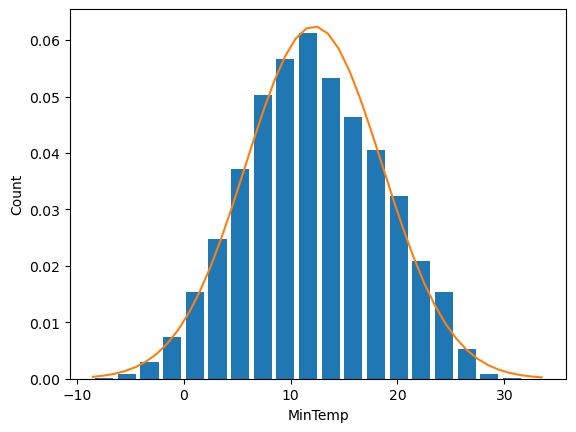

In [ ]:
## Plotting histogram with distribution curve
## https://www.youtube.com/watch?v=KFuEAGR3HS4

from scipy.stats import norm

plt.hist(df.MinTemp, bins=20, rwidth=0.8, density = True)
plt.xlabel('MinTemp')
plt.ylabel('Count')

rng = np.arange(df.MinTemp.min(), df.MinTemp.max())
plt.plot(rng, norm.pdf(rng, df.MinTemp.mean(), df.MinTemp.std()))

## Display mean & std
print('MinTemp mean:', df.MinTemp.mean())
print('MinTemp std:', df.MinTemp.std())

MaxTemp mean: 23.226784191272316
MaxTemp std: 7.109554494596622


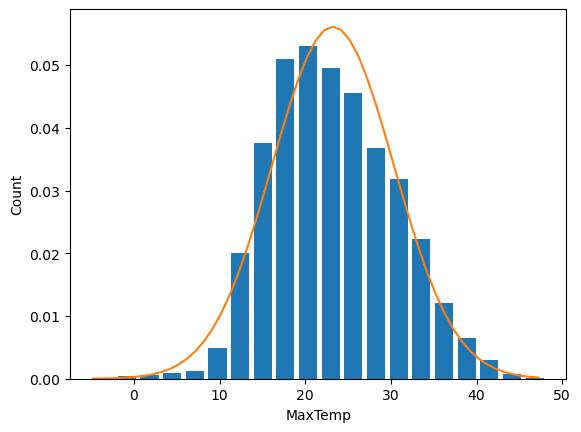

In [ ]:
plt.hist(df.MaxTemp, bins=20, rwidth=0.8, density = True)
plt.xlabel('MaxTemp')
plt.ylabel('Count')

rng = np.arange(df.MaxTemp.min(), df.MaxTemp.max())
plt.plot(rng, norm.pdf(rng, df.MaxTemp.mean(), df.MaxTemp.std()))

## Display mean & std
print('MaxTemp mean:', df.MaxTemp.mean())
print('MaxTemp std:', df.MaxTemp.std())

Rainfall mean: 2.349974074311172
Rainfall std: 8.423216965705027


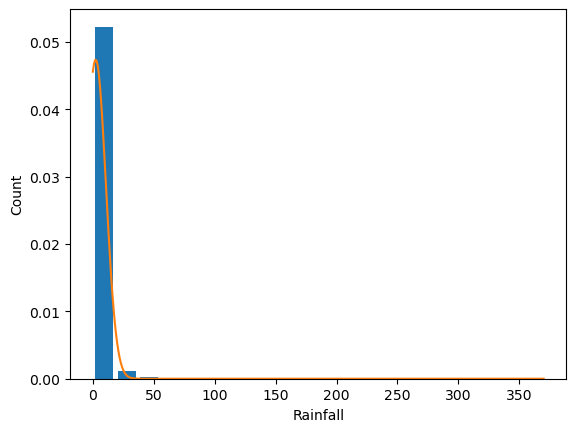

In [ ]:
plt.hist(df.Rainfall, bins=20, rwidth=0.8, density = True)
plt.xlabel('Rainfall')
plt.ylabel('Count')

rng = np.arange(df.Rainfall.min(), df.Rainfall.max())
plt.plot(rng, norm.pdf(rng, df.Rainfall.mean(), df.Rainfall.std()))

## Display mean & std
print('Rainfall mean:', df.Rainfall.mean())
print('Rainfall std:', df.Rainfall.std())

WindGustSpeed mean: 39.98429165758255
WindGustSpeed std: 13.138384980786872


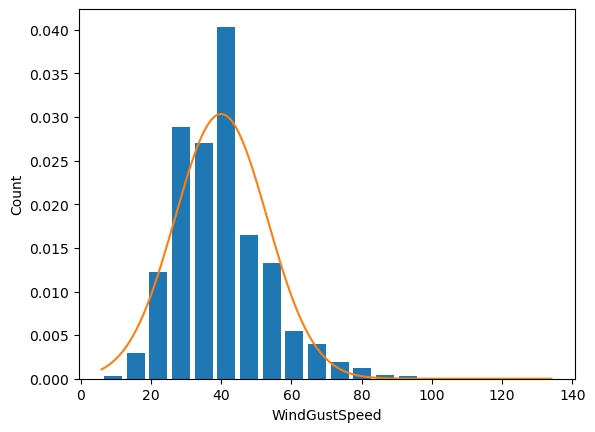

In [ ]:
plt.hist(df.WindGustSpeed, bins=20, rwidth=0.8, density = True)
plt.xlabel('WindGustSpeed')
plt.ylabel('Count')

rng = np.arange(df.WindGustSpeed.min(), df.WindGustSpeed.max())
plt.plot(rng, norm.pdf(rng, df.WindGustSpeed.mean(), df.WindGustSpeed.std()))

## Display mean & std
print('WindGustSpeed mean:', df.WindGustSpeed.mean())
print('WindGustSpeed std:', df.WindGustSpeed.std())

WindSpeed9am mean: 14.001988000994093
WindSpeed9am std: 8.851081674634793


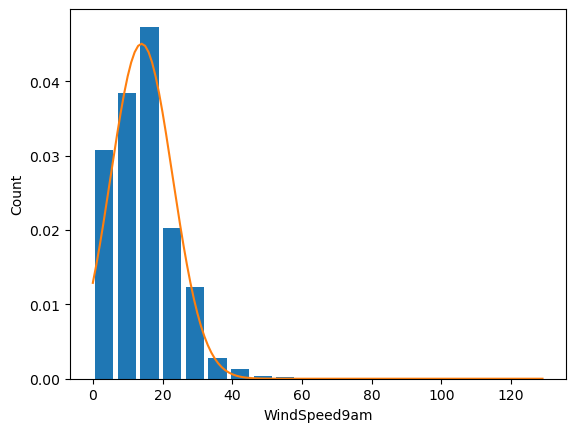

In [ ]:
plt.hist(df.WindSpeed9am, bins=20, rwidth=0.8, density = True)
plt.xlabel('WindSpeed9am')
plt.ylabel('Count')

rng = np.arange(df.WindSpeed9am.min(), df.WindSpeed9am.max())
plt.plot(rng, norm.pdf(rng, df.WindSpeed9am.mean(), df.WindSpeed9am.std()))

## Display mean & std
print('WindSpeed9am mean:', df.WindSpeed9am.mean())
print('WindSpeed9am std:', df.WindSpeed9am.std())

WindSpeed3pm mean: 18.637575861797185
WindSpeed3pm std: 8.721551199913536


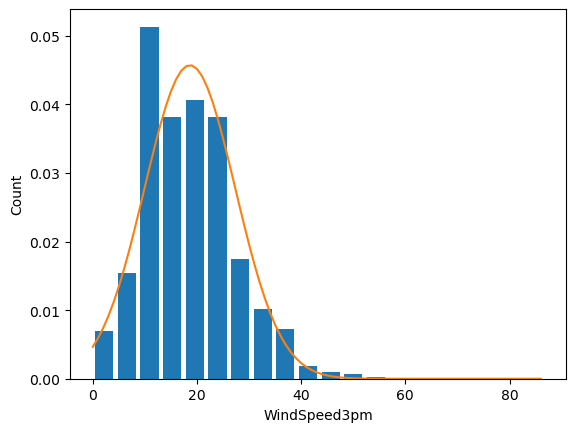

In [ ]:
plt.hist(df.WindSpeed3pm, bins=20, rwidth=0.8, density = True)
plt.xlabel('WindSpeed3pm')
plt.ylabel('Count')

rng = np.arange(df.WindSpeed3pm.min(), df.WindSpeed3pm.max())
plt.plot(rng, norm.pdf(rng, df.WindSpeed3pm.mean(), df.WindSpeed3pm.std()))

## Display mean & std
print('WindSpeed3pm mean:', df.WindSpeed3pm.mean())
print('WindSpeed3pm std:', df.WindSpeed3pm.std())

Humidity9am mean: 68.84381031057072
Humidity9am std: 18.932076724057374


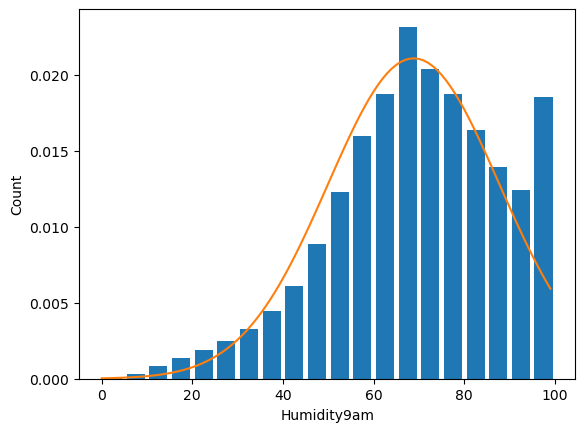

In [ ]:
plt.hist(df.Humidity9am, bins=20, rwidth=0.8, density = True)
plt.xlabel('Humidity9am')
plt.ylabel('Count')

rng = np.arange(df.Humidity9am.min(), df.Humidity9am.max())
plt.plot(rng, norm.pdf(rng, df.Humidity9am.mean(), df.Humidity9am.std()))

## Display mean & std
print('Humidity9am mean:', df.Humidity9am.mean())
print('Humidity9am std:', df.Humidity9am.std())

Humidity9am mean: 51.48260609165429
Humidity9am std: 20.532065476037054


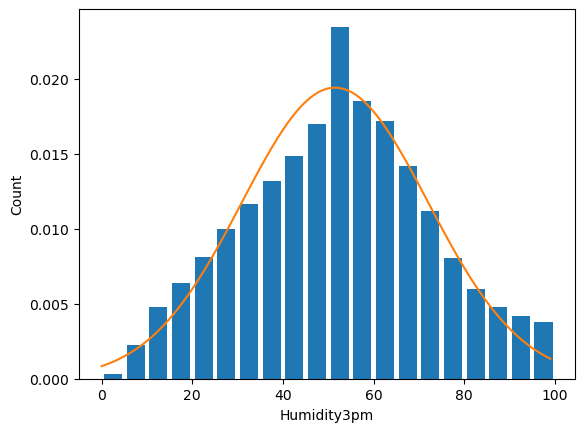

In [ ]:
plt.hist(df.Humidity3pm, bins=20, rwidth=0.8, density = True)
plt.xlabel('Humidity3pm')
plt.ylabel('Count')

rng = np.arange(df.Humidity3pm.min(), df.Humidity3pm.max())
plt.plot(rng, norm.pdf(rng, df.Humidity3pm.mean(), df.Humidity3pm.std()))

## Display mean & std
print('Humidity9am mean:', df.Humidity3pm.mean())
print('Humidity9am std:', df.Humidity3pm.std())

## Removing outliers using 3 Standard Deviation

In [ ]:
## Setting upper limit as mean + 3*std
upper_limit = df.Rainfall.mean() + 3*df.Rainfall.std()

## Setting lower limit as mean - 3*std
lower_limit = df.Rainfall.mean() - 3*df.Rainfall.std()

print('Rainfall Upper Limit :', upper_limit)
print('Rainfall Lower Limit :', lower_limit)

## Drop rows with outliers and save new dataframe as df_clean
df_clean = df[(df.Rainfall <= upper_limit) & (df.Rainfall >= lower_limit)]
df_clean.shape

Rainfall Upper Limit : 27.619624971426255
Rainfall Lower Limit : -22.919676822803908


(139784, 16)

In [ ]:
## Setting upper limit as mean + 3*std
upper_limit = df_clean.WindGustSpeed.mean() + 3*df_clean.WindGustSpeed.std()

## Setting lower limit as mean - 3*std
lower_limit = df_clean.WindGustSpeed.mean() - 3*df_clean.WindGustSpeed.std()

print('WindGustSpeed Upper Limit :', upper_limit)
print('WindGustSpeed Lower Limit :', lower_limit)

## Drop rows with outliers and save new dataframe as df_clean
df_clean = df_clean[(df_clean.WindGustSpeed <= upper_limit) & (df_clean.WindGustSpeed >= lower_limit)]
df_clean.shape

WindGustSpeed Upper Limit : 79.0100445257623
WindGustSpeed Lower Limit : 0.6986811981157786


(138215, 16)

In [ ]:
## Setting upper limit as mean + 3*std
upper_limit = df_clean.WindSpeed9am.mean() + 3*df_clean.WindSpeed9am.std()

## Setting lower limit as mean - 3*std
lower_limit = df_clean.WindSpeed9am.mean() - 3*df_clean.WindSpeed9am.std()

print('WindSpeed9am Upper Limit :', upper_limit)
print('WindSpeed9am Lower Limit :', lower_limit)

## Drop rows with outliers and save new dataframe as df_clean
df_clean = df_clean[(df_clean.WindSpeed9am <= upper_limit) & (df_clean.WindSpeed9am >= lower_limit)]
df_clean.shape

WindSpeed9am Upper Limit : 39.55642634266984
WindSpeed9am Lower Limit : -12.00636873286896


(137314, 16)

In [ ]:
## Setting upper limit as mean + 3*std
upper_limit = df_clean.WindSpeed3pm.mean() + 3*df_clean.WindSpeed3pm.std()

## Setting lower limit as mean - 3*std
lower_limit = df_clean.WindSpeed3pm.mean() - 3*df_clean.WindSpeed3pm.std()

print('WindSpeed3pm Upper Limit :', upper_limit)
print('WindSpeed3pm Lower Limit :', lower_limit)

## Drop rows with outliers and save new dataframe as df_clean
df_clean = df_clean[(df_clean.WindSpeed3pm <= upper_limit) & (df_clean.WindSpeed3pm >= lower_limit)]
df_clean.shape

WindSpeed3pm Upper Limit : 43.3498766174015
WindSpeed3pm Lower Limit : -6.7211851958373


(136649, 16)

In [ ]:
df_clean.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday,RainTomorrow
count,136649.000000,136649.000000,136649.000000,136649.000000,136649.000000,136649.000000,136649.000000,136649.000000,136649.000000,136649.000000,136649.000000,136649.000000,136649.000000,136649.000000,136649.000000,136649.000000
mean,1926.762486,23.705611,12.093245,23.260156,1.480144,8.025811,39.035504,6.965730,7.755227,13.521435,18.173357,68.683587,51.059964,1017.900645,0.204729,0.210759
std,886.507767,14.260164,6.393055,7.095368,3.851713,4.700050,11.792898,4.515793,4.550850,8.189211,8.111466,18.834619,20.298833,6.593937,0.403505,0.407849
min,0.000000,0.000000,-8.500000,-4.800000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,982.200000,0.000000,0.000000
25%,1162.000000,11.000000,7.500000,18.000000,0.000000,4.000000,31.000000,3.000000,4.000000,7.000000,13.000000,57.000000,37.000000,1013.800000,0.000000,0.000000
50%,1948.000000,24.000000,11.900000,22.700000,0.000000,9.000000,39.000000,7.000000,8.000000,13.000000,18.637576,69.000000,51.482606,1017.653758,0.000000,0.000000
75%,2695.000000,36.000000,16.700000,28.200000,0.600000,13.000000,46.000000,11.000000,12.000000,19.000000,24.000000,82.000000,65.000000,1022.000000,0.000000,0.000000
max,3435.000000,48.000000,33.900000,47.300000,27.600000,15.000000,78.000000,15.000000,15.000000,39.000000,43.000000,100.000000,100.000000,1041.000000,1.000000,1.000000


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136649 entries, 0 to 145458
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           136649 non-null  int32  
 1   Location       136649 non-null  int32  
 2   MinTemp        136649 non-null  float64
 3   MaxTemp        136649 non-null  float64
 4   Rainfall       136649 non-null  float64
 5   WindGustDir    136649 non-null  int32  
 6   WindGustSpeed  136649 non-null  float64
 7   WindDir9am     136649 non-null  int32  
 8   WindDir3pm     136649 non-null  int32  
 9   WindSpeed9am   136649 non-null  float64
 10  WindSpeed3pm   136649 non-null  float64
 11  Humidity9am    136649 non-null  float64
 12  Humidity3pm    136649 non-null  float64
 13  Pressure9am    136649 non-null  float64
 14  RainToday      136649 non-null  int32  
 15  RainTomorrow   136649 non-null  int32  
dtypes: float64(9), int32(7)
memory usage: 14.1 MB


## Splitting the cleaned data for Training & Testing

In [ ]:
from sklearn.model_selection import train_test_split

df_clean.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,0,0
1,397,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,0,0
2,398,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,0,0
3,399,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,0,0
4,400,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,0,0


In [ ]:
x = df_clean.drop(columns=['RainTomorrow'],axis=1) #remove RainTomorrow & Date columns in the output
y = df_clean['RainTomorrow'] #only show the RainTomorrow column

## I have given the paramenter for test size = 0.2 which means that 20% of the data is used for testing.
## The remaining 80% of the data is used for training.
## To get the same spilt every time, random_state = 1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=10)

## Normalization scaling as columns have a wide range of values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Display the shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(f'Size of Training set: {len(x_train), len(y_train)}')
print(f'Size of Test set {len(x_test), len(y_test)}')

(109319, 15)
(27330, 15)
(109319,)
(27330,)
Size of Training set: (109319, 109319)
Size of Test set (27330, 27330)


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## Create Random Forest classifer object
rf_model = RandomForestClassifier()

## Train Random Forest Classifer
rf_model.fit(x_train, y_train)

## Predict the response for test dataset
y_pred = rf_model.predict(x_test)

## Reporting of Random Forest Classifier

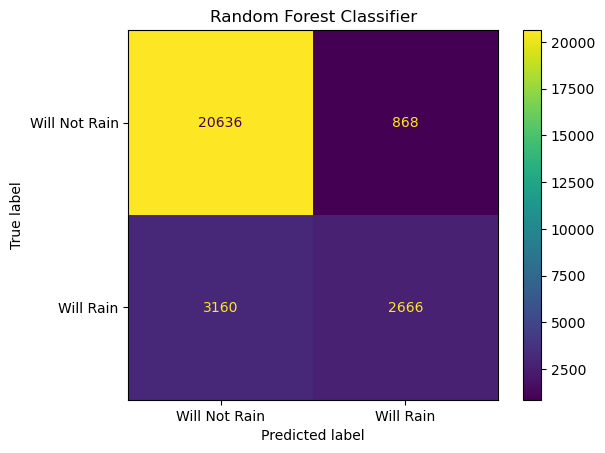

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     21504
           1       0.75      0.46      0.57      5826

    accuracy                           0.85     27330
   macro avg       0.81      0.71      0.74     27330
weighted avg       0.84      0.85      0.84     27330

Random Forest Classifier Accuracy: 85.26161727039883


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf_cm = metrics.confusion_matrix(y_test,y_pred)
rf_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = rf_cm, display_labels = ["Will Not Rain", "Will Rain"])

## Plot Random Forest Confusion Matrix
rf_cm_display.plot()
plt.title('Random Forest Classifier')
plt.show()
# [TN,FN]
# [FP,TP]

## Random Forest Classification Report
print(classification_report(y_test, y_pred))

## Random Forest Accuracy
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

## K-Nearest Neighbours

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier

## Create K-Nearest Neighbours classifer object
knn_model = KNeighborsClassifier(n_neighbors=5)

## Train K-Nearest Neighbours Classifer
knn_model.fit(x_train, y_train)

## Predict the response for test dataset
y_pred = knn_model.predict(x_test)

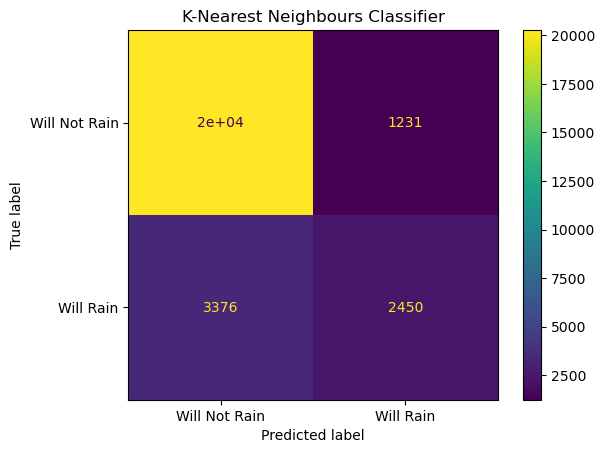

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     21504
           1       0.67      0.42      0.52      5826

    accuracy                           0.83     27330
   macro avg       0.76      0.68      0.71     27330
weighted avg       0.82      0.83      0.82     27330

K-Nearest Neighbours Classifier Accuracy: 83.14306622758873


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

knn_cm = metrics.confusion_matrix(y_test,y_pred)
knn_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = knn_cm, display_labels = ["Will Not Rain", "Will Rain"])

## Plot K-Nearest Neighbours Confusion Matrix
knn_cm_display.plot()
plt.title('K-Nearest Neighbours Classifier')
plt.show()
# [TN,FN]
# [FP,TP]

## K-Nearest Neighbours Classification Report
print(classification_report(y_test, y_pred))

## K-Nearest Neighbours Accuracy
print("K-Nearest Neighbours Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)